## CIFAR-10 - Object Recognition in Images

is a estimated computer-vision dataset used for object recognition. It is a subset of the **80 million tiny images dataset** and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair and Geoffrey Hinton.


### Table of Contents
<ul>
    <li>Problem Statement</li>
    <li>Import Libaries</li>
    <li>Exploring the Data</li>
    <li>Training and Validation Datasets</li>
   <li>Convolutional Neural Network (CNN)</li>
    <li>Training the Model</li>
    <li>Testing with individual images</li>
</ul>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import datasets,layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
#keras-Tuner
import kerastuner 
from kerastuner.tuners import RandomSearch

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
#load and split data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
#columns name
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Visualizing


CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. We can look at some of the images below.

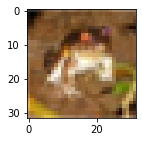

In [10]:
plt.figure(figsize= (10,2))
plt.imshow(X_train[0]) # frog

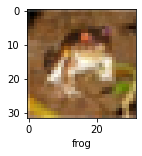

In [11]:
### we want to see the images with there labels.
def plot_sample(X,y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train, y_train, 0)

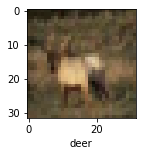

In [12]:
plot_sample(X_train, y_train, 3)

**Preprocessing:Scale Images**

In [13]:
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val)/(max_val-min_val)
    return x

In [14]:
X_train = X_train.astype('float32') #always convert images into float
X_test = X_test.astype('float32')

X_train = normalize(X_train)
X_test = normalize(X_test)

X_train = X_train.reshape(-1,32,32,3) #reshaping for convnet

In [15]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
X_train[0].shape

(32, 32, 3)

In [19]:
#save our prepocessed data
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()



Looks like our model is overfitting in a simple base model, I think we have to increase our data.

In [23]:
from keras.preprocessing.image import ImageDataGenerator

# augumenting
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest')

In [24]:
datagen.fit(X_train)

In [25]:
BATCH_SIZE = 128
NB_EPOCH = 50

In [26]:
# train
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=BATCH_SIZE),
                              steps_per_epoch=50000//128,
                              epochs=NB_EPOCH,
                              validation_data = (X_test,y_test),
                             validation_steps=10000//128)


C:\Users\vaibh\miniconda3\envs\Ai\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
390/390 [==============================] - 44s 93ms/step - loss: 2.0058 - accuracy: 0.3032 - val_loss: 1.6202 - val_accuracy: 0.4541
Epoch 2/50
390/390 [==============================] - 25s 65ms/step - loss: 1.7204 - accuracy: 0.3757 - val_loss: 1.4734 - val_accuracy: 0.4843
Epoch 3/50
390/390 [==============================] - 26s 68ms/step - loss: 1.6422 - accuracy: 0.4024 - val_loss: 1.4468 - val_accuracy: 0.5006
Epoch 4/50
390/390 [==============================] - 24s 61ms/step - loss: 1.5966 - accuracy: 0.4268 - val_loss: 1.3170 - val_accuracy: 0.5433ccuracy: 0.42 - ETA: 2s - loss: 1.5998 - accuracy - - ETA: 0s - loss: 1.5975 - accu
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 1.5627 - accuracy: 0.4396 - val_loss: 1.2782 - val_accuracy: 0.5421
Epoch 6/50
390/390 [==============================] - 23s 58ms/step - loss: 1.5343 - accuracy: 0.4496 - val_loss: 1.2578 - val_accuracy: 0.5572
Epoch 7/50
390/390 [==============================] -

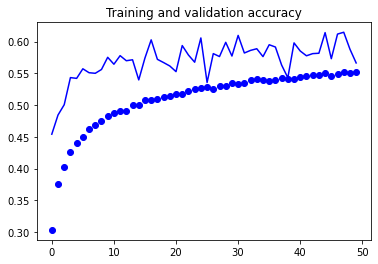

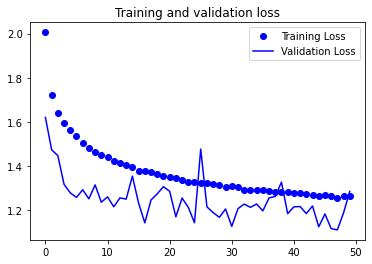

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Our model is underfit.